(103344, 4)
[False False False ...  True  True  True]
[    88     89     90 ... 103341 103342 103343]
(53332,)
[17.216 17.075 16.943 ...  3.764  3.777  3.789]
[-441 -441 -441 ...   70   70   70]
[-860 -853 -847 ... -188 -188 -189]
-5.492
0.896
[ 0.863  0.859  0.855 ... -1.759 -1.764 -1.769]
(53332,)
1001
1001


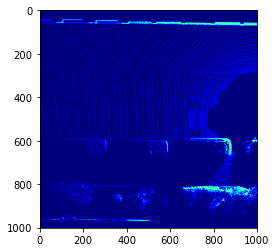

In [11]:
import numpy as np
from PIL import Image
import cv2
import matplotlib.pyplot as plt

pointcloud = np.fromfile(str("/media/yons/linux1/kitti_second/training/velodyne/000107.bin"), dtype=np.float32, count=-1).reshape(-1,4)
print(pointcloud.shape)
x = pointcloud[:,0]
y = pointcloud[:,1]
z = pointcloud[:,2]

side_range = (-10, 10)
front_range = (0, 20)
front_filter = np.logical_and((x>front_range[0]),(x<front_range[1]))
side_filter = np.logical_and((y>side_range[0]),(y<side_range[1]))
dual_filter = np.logical_and(front_filter, side_filter)
print(dual_filter)
indices = np.argwhere(dual_filter).flatten()
print(indices)

x_filtered = x[indices]
y_filtered = y[indices]
z_filtered = z[indices]
print(x_filtered.shape)
print(x_filtered)

# convert coordinate
res = 0.02
x_img = (-y_filtered / res).astype(np.int32)
y_img = (-x_filtered / res).astype(np.int32)
print(x_img)
print(y_img)

# shift origin to(0,0)
x_img_center = (x_img - side_range[0] / res).astype(np.int32)
y_img_center = (y_img + front_range[1] / res).astype(np.int32)

print(z_filtered.min())
print(z_filtered.max())
z_range = (-3, 1)
z_points = np.clip(z_filtered, a_min=z_range[0], a_max=z_range[1])
print(z_points)

def z_scale_to_255(z, min, max):
    z_normalized = ((z-min)*255/(max-min)).astype(dtype=np.uint8)
    return z_normalized

z_min = z_points.min()
z_max = z_points.max()
z_pixel = z_scale_to_255(z_points, z_min, z_max)
print(z_pixel.shape)

x_max = int((side_range[1]-side_range[0])/res)+1
y_max = int((front_range[1]-front_range[0])/res)+1
print(x_max)
print(y_max)
im = np.zeros([x_max, y_max], dtype=np.uint8)
im[x_img_center, y_img_center]= z_pixel

plt.imshow(im, cmap="jet", vmin=0, vmax=255)
plt.show()

#im2 = Image.fromarray(im)
#im2.show()